# Source stability
## 2-photon visibilities
### Import data

In [3]:
import glob
import pandas as pd
import numpy as np

In [8]:
# detector lists
detectors = {'h1t':[1],'h1s':[6],'v1t':[2],'v1s':[4],
             'h2t':[7],'h2s':[3],'v2t':[8],'v2s':[12],
             'h1h1':[1,6],'h1v1':[1,4],'v1h1':[2,6],'v1v1':[2,4],'acc1t':[1,2],'acc1s':[4,6],
             'h2h2':[3,7],'h2v2':[3,8],'v2h2':[12,7],'v2v2':[12,8],'acc2s':[3,12],'acc2t':[7,8]}

# turn lists into addresses
for el in detectors:
    address = 0
    for det in detectors[el]:
        address += 2**(det-1)
    detectors[el] = address
        
#sort dictionary
detectors = {k: v for k, v in sorted(detectors.items(), key=lambda item: item[1])}
print(detectors)

# fill lists of columns to import and their labels
# name colunms
cols_to_imp = []
cols_labels = []

for el in detectors:
    cols_labels.append(el)
    cols_to_imp.append(detectors[el])

# find all data files
fold = 'data/2020_02_10/stability/'
dat_files = glob.glob(fold + '*.dat')
print(cols_to_imp)
            
for dat_file in dat_files:
    if 'P12da' in dat_file:
        # add to dataframe
        df12da = pd.read_csv(dat_file, sep=' ', header=None, names=cols_labels, usecols=cols_to_imp)
    elif 'P1da' in dat_file:
        # add to dataframe
        df1da = pd.read_csv(dat_file, sep=' ', header=None, names=cols_labels, usecols=cols_to_imp)
   
df12da.head(5)

{'h1t': 1, 'v1t': 2, 'acc1t': 3, 'h2s': 4, 'v1s': 8, 'h1v1': 9, 'v1v1': 10, 'h1s': 32, 'h1h1': 33, 'v1h1': 34, 'acc1s': 40, 'h2t': 64, 'h2h2': 68, 'v2t': 128, 'h2v2': 132, 'acc2t': 192, 'v2s': 2048, 'acc2s': 2052, 'v2h2': 2112, 'v2v2': 2176}
[1, 2, 3, 4, 8, 9, 10, 32, 33, 34, 40, 64, 68, 128, 132, 192, 2048, 2052, 2112, 2176]


,h1t,v1t,acc1t,h2s,v1s,h1v1,v1v1,h1s,h1h1,v1h1,acc1s,h2t,h2h2,v2t,h2v2,acc2t,v2s,acc2s,v2h2,v2v2
0,303353,314211,1303,300003,258557,1773,58940,270245,56835,1893,916,305307,59635,298415,1590,1204,282223,1214,1353,54272
1,301736,312087,1362,298302,258308,1792,58485,268340,56566,1850,997,304487,58892,295901,1605,1229,280361,1169,1334,53338
2,302603,311816,1278,297035,259128,1850,58845,269961,57111,1913,955,305609,59713,296483,1669,1255,280014,1158,1280,54065
3,304852,314077,1331,299378,260203,1854,58731,271728,57723,1894,998,305282,59017,296830,1550,1282,282014,1135,1324,53399
4,304436,314739,1282,300421,260393,1846,59301,271239,56976,1867,952,305982,59782,297453,1543,1242,282166,1221,1268,54024


All data is in dataframe
 - Pair 1 & Pair 2 - d/a: `df12da`

### Analysis: overall visibility

In [9]:
from uncertainties import ufloat
#from uncertainties.umath import *

# without correction for accidentals
def vis2phU(dataframe,pair):
    if pair == 1:
        h1h1 = ufloat(dataframe['h1h1'].sum(), np.sqrt(dataframe['h1h1'].sum()))
        h1v1 = ufloat(dataframe['h1v1'].sum(), np.sqrt(dataframe['h1v1'].sum()))
        v1h1 = ufloat(dataframe['v1h1'].sum(), np.sqrt(dataframe['v1h1'].sum()))
        v1v1 = ufloat(dataframe['v1v1'].sum(), np.sqrt(dataframe['v1v1'].sum()))
        return (h1h1-h1v1-v1h1+v1v1)/(h1h1+h1v1+v1h1+v1v1)
    elif pair == 2:
        h2h2 = ufloat(dataframe['h2h2'].sum(), np.sqrt(dataframe['h2h2'].sum()))
        h2v2 = ufloat(dataframe['h2v2'].sum(), np.sqrt(dataframe['h2v2'].sum()))
        v2h2 = ufloat(dataframe['v2h2'].sum(), np.sqrt(dataframe['v2h2'].sum()))
        v2v2 = ufloat(dataframe['v2v2'].sum(), np.sqrt(dataframe['v2v2'].sum()))
        return (h2h2-h2v2-v2h2+v2v2)/(h2h2+h2v2+v2h2+v2v2)
    
print('P1 sigma_x: {:P}'.format(vis2phU(df12da,1)))
print('P2 sigma_x: {:P}'.format(vis2phU(df12da,2)))

# with correction for accidentals
def vis2phU_corr(dataframe,pair):
    if pair == 1:
        h1h1 = ufloat(dataframe['h1h1'].sum(), np.sqrt(dataframe['h1h1'].sum()))
        h1v1 = ufloat(dataframe['h1v1'].sum(), np.sqrt(dataframe['h1v1'].sum()))
        v1h1 = ufloat(dataframe['v1h1'].sum(), np.sqrt(dataframe['v1h1'].sum()))
        v1v1 = ufloat(dataframe['v1v1'].sum(), np.sqrt(dataframe['v1v1'].sum()))
        acc1s = ufloat(dataframe['acc1s'].sum(), np.sqrt(dataframe['acc1s'].sum()))
        acc1t = ufloat(dataframe['acc1t'].sum(), np.sqrt(dataframe['acc1t'].sum()))
        return (h1h1-h1v1-v1h1+v1v1)/(h1h1+h1v1+v1h1+v1v1-2*(acc1s+acc1t))
    elif pair == 2:
        h2h2 = ufloat(dataframe['h2h2'].sum(), np.sqrt(dataframe['h2h2'].sum()))
        h2v2 = ufloat(dataframe['h2v2'].sum(), np.sqrt(dataframe['h2v2'].sum()))
        v2h2 = ufloat(dataframe['v2h2'].sum(), np.sqrt(dataframe['v2h2'].sum()))
        v2v2 = ufloat(dataframe['v2v2'].sum(), np.sqrt(dataframe['v2v2'].sum()))
        acc2s = ufloat(dataframe['acc2s'].sum(), np.sqrt(dataframe['acc2s'].sum()))
        acc2t = ufloat(dataframe['acc2t'].sum(), np.sqrt(dataframe['acc2t'].sum()))
        return (h2h2-h2v2-v2h2+v2v2)/(h2h2+h2v2+v2h2+v2v2-2*(acc2s+acc2t))

print('With correction for accidentals:')
print('P1 sigma_x: {:P}'.format(vis2phU_corr(df12da,1)))
print('P2 sigma_x: {:P}'.format(vis2phU_corr(df12da,2)))

P1 sigma_x: 0.938256±0.000008
P2 sigma_x: 0.945644±0.000007
With correction for accidentals:
P1 sigma_x: 0.975983±0.000010
P2 sigma_x: 0.987621±0.000010


## Analysis: plot visibility in time

In [206]:
# create columns with visibility for every second
df12da['vis1'] = ((df12da.h1h1+df12da.v1v1-df12da.h1v1-df12da.v1h1)/
                 (df12da.h1h1+df12da.v1v1+df12da.h1v1+df12da.v1h1))
df12da['vis2'] = ((df12da.h2h2+df12da.v2v2-df12da.h2v2-df12da.v2h2)/
                 (df12da.h2h2+df12da.v2v2+df12da.h2v2+df12da.v2h2))


16929


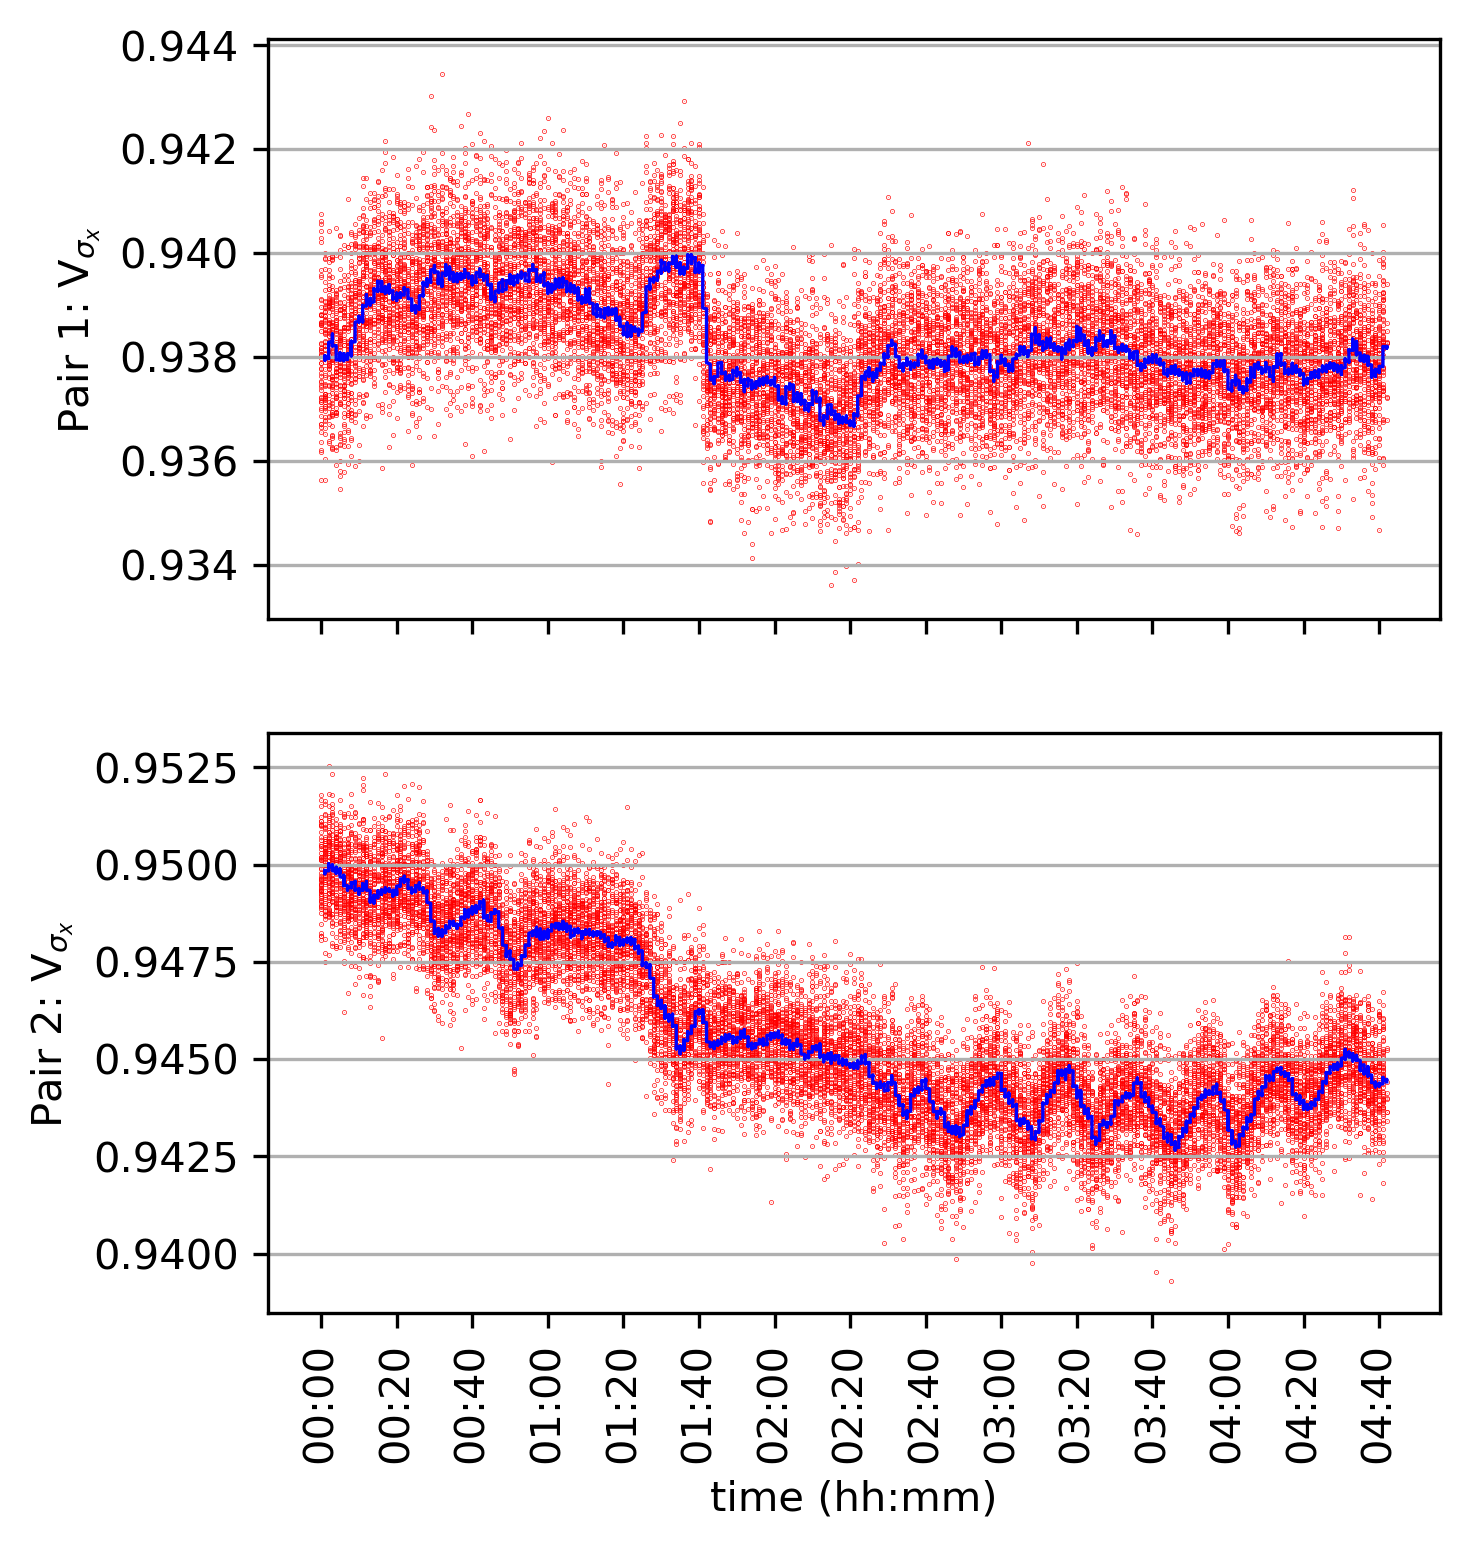

In [207]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm,ticker,colors
import time

# plot
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5, 5), dpi=300)

# x data
max_time = len(df12da['h1h1'].index)
secs = np.arange(0, max_time, 1)
hh_mm = [time.strftime('%H:%M', time.gmtime(secs[i])) for i in secs]

print(len(hh_mm))

ax[0].scatter(hh_mm, df12da.vis1, s=.1, c='r', marker='.', label='')
ax[1].scatter(hh_mm, df12da.vis2, s=.1, c='r', marker='.', label='')

# add moving average
roll_avg1 = df12da.vis1.rolling(window=100).mean()
roll_avg2 = df12da.vis2.rolling(window=100).mean()
ax[0].plot(hh_mm, roll_avg1, 'b', linewidth=.8, label='')
ax[1].plot(hh_mm, roll_avg2, 'b', linewidth=.8, label='')


#plt.tick_params(axis='y', which='minor')
#plt.tick_params(axis='x', which='major')
ax[0].set_ylabel('Pair 1: V$_{\sigma_x}$')
ax[1].set_ylabel('Pair 2: V$_{\sigma_x}$')
ax[1].set_xlabel('time (hh:mm)')
#plt.yscale('log')
for el in ax:
    el.grid(axis='y')
    el.xaxis.set_major_locator(plt.MaxNLocator(20))

plt.tight_layout()

plt.draw()

for el in ax:
    el.set_xticklabels(el.get_xticklabels(), rotation=90, ha='center')

ax[0].xaxis.set_ticklabels([])
#ax[0].get_xaxis().set_visible(False)
plt.show()

fig.savefig("P1-P2_sigma_x_vis_long.png", format='png', bbox_inches='tight')

# Laser power stability

### Import old data (May 2017)
Column with power is called `'power'`

In [195]:
import pandas as pd

# import txt file
file_in= 'data/2020_02_10/stability/ChameleonUltra_14-May-2017_10_03_27.txt'
df_ls_OLD = pd.read_csv(file_in, sep='\s', engine='python', header=None, names=['date','time','power'], usecols=[1,2,4])

df_ls_OLD.head()
df_ls_OLD.power.min()-df_ls_OLD.power.max()

-16

### Import new data (Feb 2020)
Column with power is called `'V2D'`

In [14]:
import pandas as pd

# import csv file
file_in= 'data/2020_02_10/stability/ChameleonUltra_6750_10-Feb-2020_13_15_42.csv'
df_ls = pd.read_csv(file_in, sep=',', index_col=False)

df_ls['V2D'].head()

0    2839
1    2829
2    2826
3    2832
4    2827
Name: V2D, dtype: int64

### Histogram of laser power

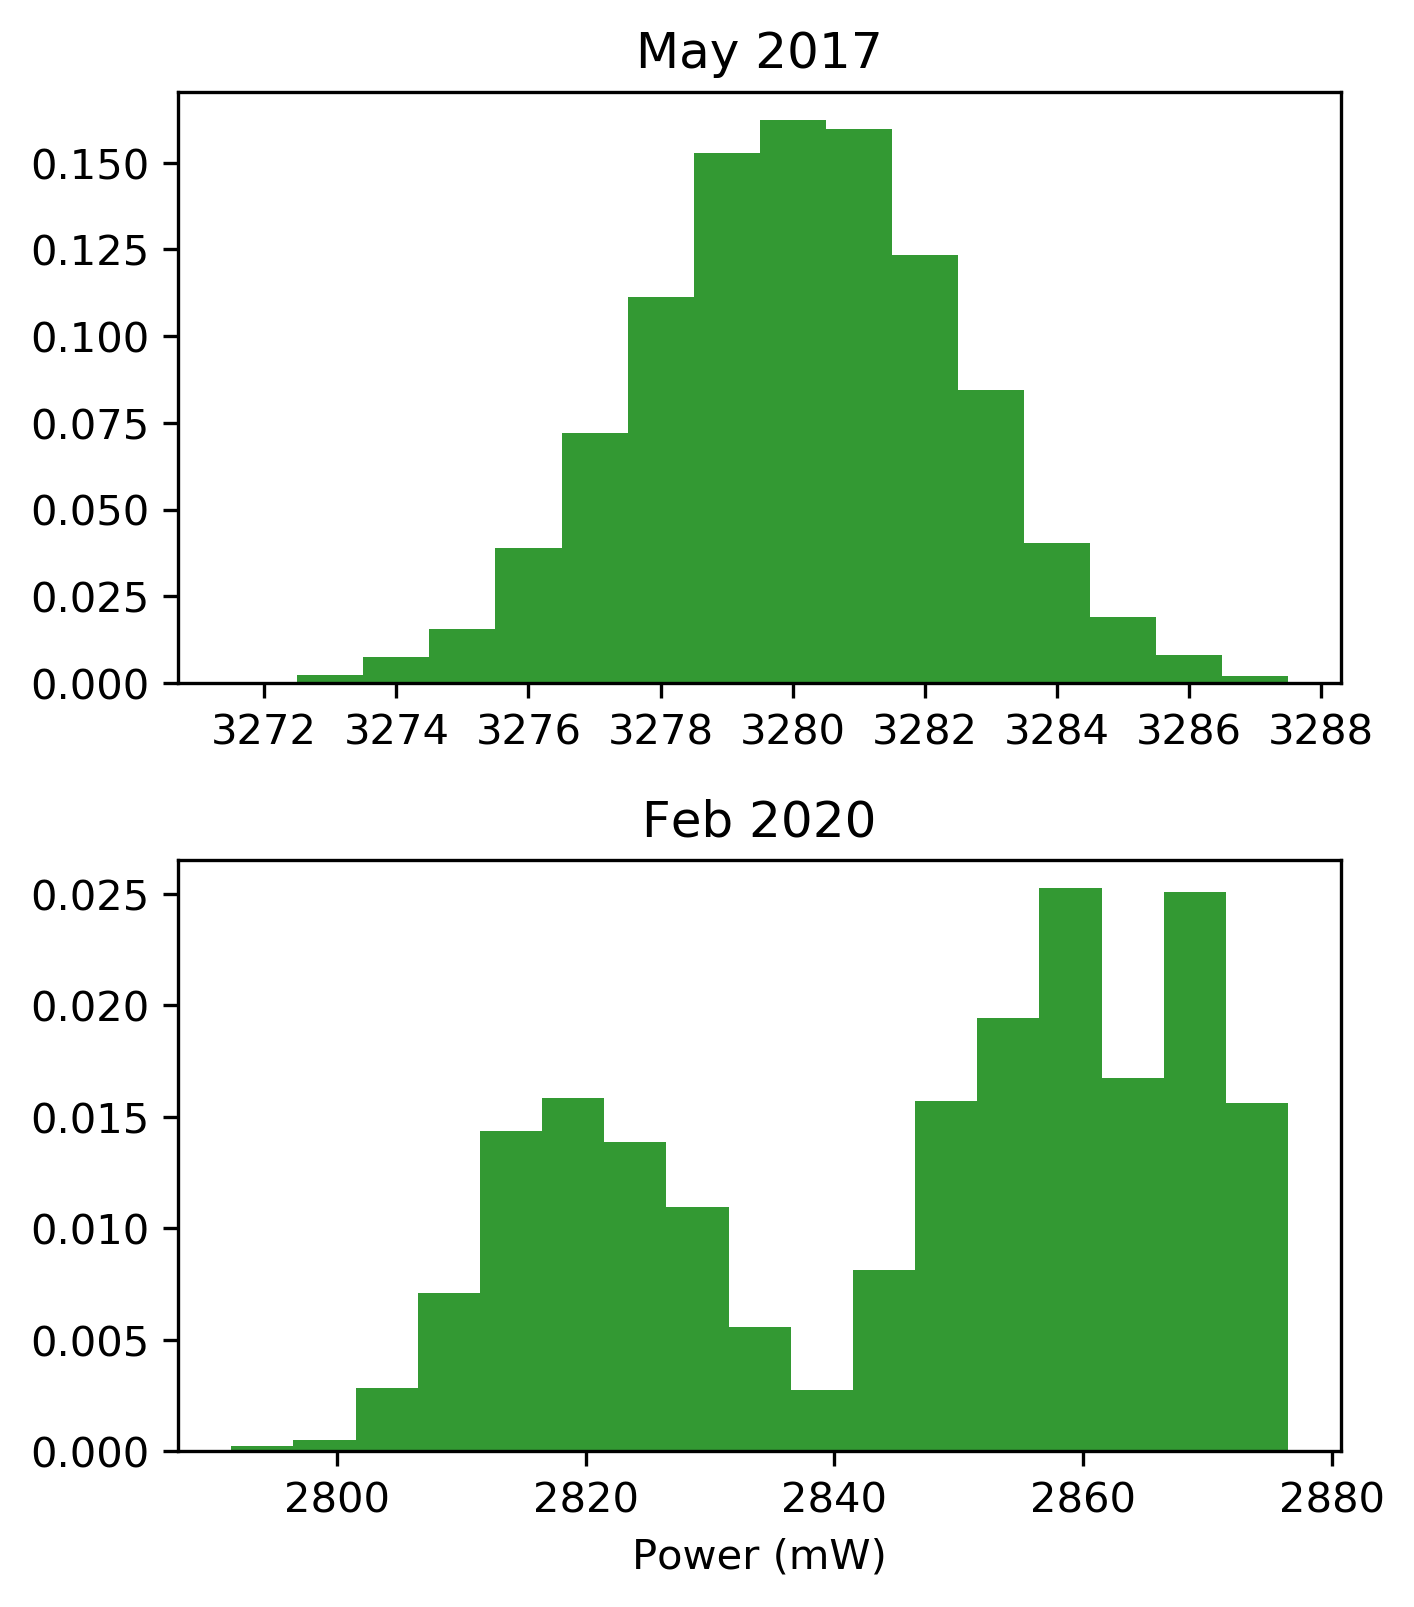

In [210]:
fig1, ax = plt.subplots(nrows=2, ncols=1, figsize=(5, 6), dpi=300)
df_ls_OLD.hist(column='power', bins=16, grid=False, ax=ax[0], density=True, 
           align='left',facecolor='green', alpha=0.8)

df_ls.hist(column='V2D', bins=17, grid=False, ax=ax[1], density=True, 
           align='left',facecolor='green', alpha=0.8)

ax[0].set_title(r'May 2017')
ax[1].set_title(r'Feb 2020')
ax[1].set_xlabel(r'Power (mW)')

plt.plot()

fig1.savefig("Laser_output_power_hist_2017_2020.png", format='png', bbox_inches='tight')

### Laser power in time

4999
2686


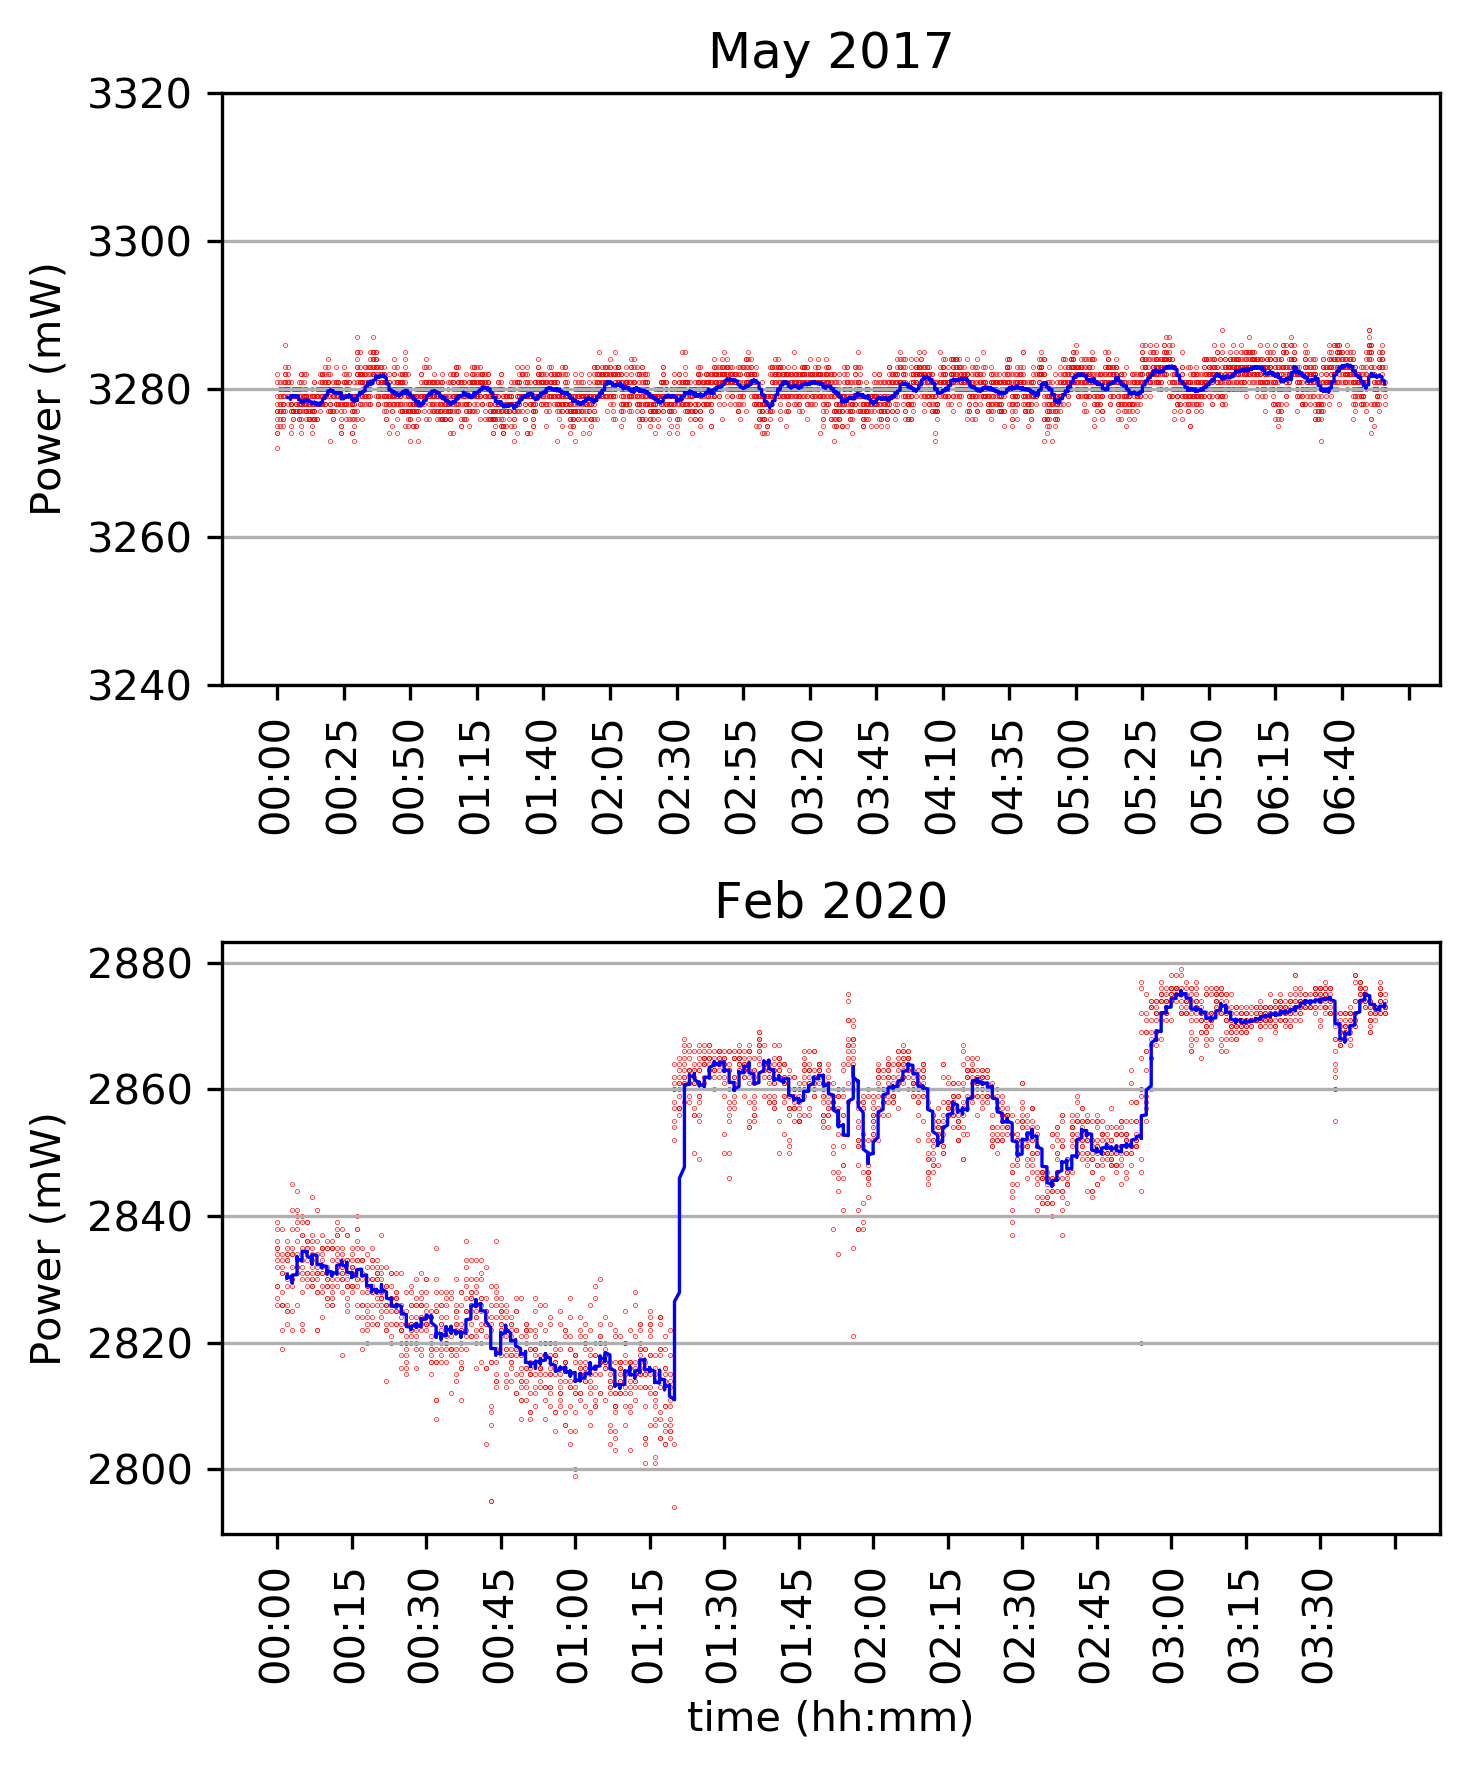

In [211]:
# plot
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5, 6), dpi=300)

# old data
# x data
max_time_OLD = len(df_ls_OLD.power.index)
secs_OLD = np.arange(0, max_time_OLD*5, 5)
hh_mm_ls_OLD = [time.strftime('%H:%M', time.gmtime(i)) for i in secs_OLD]

print(len(hh_mm_ls_OLD))

# new data
# x data
max_time = len(df_ls.V2D.index)
secs = np.arange(0, max_time*5, 5)
hh_mm_ls = [time.strftime('%H:%M', time.gmtime(i)) for i in secs]

print(len(hh_mm_ls))

ax[0].scatter(hh_mm_ls_OLD, df_ls_OLD.power, s=.1, c='r', marker='.', label='')
ax[1].scatter(hh_mm_ls, df_ls.V2D, s=.1, c='r', marker='.', label='')

# add moving average
roll_avg_ls_OLD = df_ls_OLD.power.rolling(window=60).mean()
ax[0].plot(hh_mm_ls_OLD, roll_avg_ls_OLD, 'b', linewidth=.8, label='')

roll_avg_ls = df_ls.V2D.rolling(window=30).mean()
ax[1].plot(hh_mm_ls, roll_avg_ls, 'b', linewidth=.8, label='')

ax[1].set_xlabel('time (hh:mm)')
ax[0].set_ylabel('Power (mW)')
ax[1].set_ylabel('Power (mW)')

ax[0].grid(axis='y')
ax[0].xaxis.set_major_locator(plt.MaxNLocator(20))
ax[0].set_ylim(3280-40,3280+40)
ax[0].set_title('May 2017')

ax[1].grid(axis='y')
ax[1].xaxis.set_major_locator(plt.MaxNLocator(20))
ax[1].set_title('Feb 2020')

plt.draw()

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90, ha='center')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='center')

#ax.xaxis.set_ticklabels([])

plt.tight_layout()
plt.show()

fig.savefig("Laser_output_power_long_2017_2020.png", format='png', bbox_inches='tight')